# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly

## Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [223]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
print(f"df_hh_income: Row:{df_hh_income.shape[0]},Column:{df_hh_income.shape[1]}")
print(f"df_pct_poverty: Row:{df_pct_poverty.shape[0]},Column:{df_pct_poverty.shape[1]}")
print(f"df_pct_completed_hs:Row:{df_pct_completed_hs.shape[0]},Column:{df_pct_completed_hs.shape[1]}")
print(f"df_share_race_city: Row:{df_share_race_city.shape[0]},Column:{df_share_race_city.shape[1]}")
print(f"df_fatalities: Row:{df_fatalities.shape[0]},Column:{df_fatalities.shape[1]}")

df_hh_income: Row:29322,Column:3
df_pct_poverty: Row:29329,Column:3
df_pct_completed_hs:Row:29329,Column:3
df_share_race_city: Row:29268,Column:7
df_fatalities: Row:2535,Column:14


In [6]:
print(f"Column Names:\ndf_hh_income:{df_hh_income.columns}")
print(f"df_pct_poverty: {df_pct_poverty.columns}")
print(f"df_pct_completed_hs: {df_pct_completed_hs.columns}")
print(f"df_share_race_city: {df_share_race_city.columns}")
print(f"df_fatalities: {df_fatalities.columns}")

Column Names:
df_hh_income:Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
df_pct_poverty: Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
df_pct_completed_hs: Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
df_share_race_city: Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
df_fatalities: Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')


In [7]:
print(f"Is there any NaN values or duplicates:\n\ndf_hh_income: NAN:{df_hh_income.isna().any()},Duplicate:{df_hh_income.duplicated().any()}")
print(f"\n\ndf_pct_poverty: NAN:{df_pct_poverty.isna().any()},Duplicate:{df_pct_poverty.duplicated().any()}")
print(f"\n\ndf_pct_completed_hs:NAN:{df_pct_completed_hs.isna().any()},Duplicate:{df_pct_completed_hs.duplicated().any()}")
print(f"\n\ndf_share_race_city: NAN:{df_share_race_city.isna().any()},Duplicate:{df_share_race_city.duplicated().any()}")
print(f"\n\ndf_fatalities: NAN:{df_fatalities.isna().any()},Duplicate:{df_fatalities.duplicated().any()}")

Is there any NaN values or duplicates:

df_hh_income: NAN:Geographic Area    False
City               False
Median Income       True
dtype: bool,Duplicate:False


df_pct_poverty: NAN:Geographic Area    False
City               False
poverty_rate       False
dtype: bool,Duplicate:False


df_pct_completed_hs:NAN:Geographic Area         False
City                    False
percent_completed_hs    False
dtype: bool,Duplicate:False


df_share_race_city: NAN:Geographic area          False
City                     False
share_white              False
share_black              False
share_native_american    False
share_asian              False
share_hispanic           False
dtype: bool,Duplicate:False


df_fatalities: NAN:id                         False
name                       False
date                       False
manner_of_death            False
armed                       True
age                         True
gender                     False
race                        True
city          

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [210]:
df_hh_income.fillna(0,inplace=True)
df_hh_income

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667
...,...,...,...
29317,WY,Woods Landing-Jelm CDP,0
29318,WY,Worland city,41523
29319,WY,Wright town,77114
29320,WY,Yoder town,37500


In [211]:
df_pct_poverty.fillna(0,inplace=True)
df_pct_poverty

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,18.6
29325,WY,Worland city,15.3
29326,WY,Wright town,5.9
29327,WY,Yoder town,5.4


In [212]:
df_pct_completed_hs.fillna(0,inplace=True)
df_pct_completed_hs

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,100
29325,WY,Worland city,85.6
29326,WY,Wright town,89.2
29327,WY,Yoder town,79.4


In [213]:
df_share_race_city.fillna(0,inplace=True)
df_share_race_city

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3
...,...,...,...,...,...,...,...
29263,WY,Woods Landing-Jelm CDP,95.9,0,0,2.1,0
29264,WY,Worland city,89.9,0.3,1.3,0.6,16.6
29265,WY,Wright town,94.5,0.1,1.4,0.2,6.2
29266,WY,Yoder town,97.4,0,0,0,4


In [214]:
df_fatalities.fillna(0,inplace=True)
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,0,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,0.00,M,0,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,0,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


<h1>Type Conversion</h1>

In [13]:
df_pct_poverty.poverty_rate=df_pct_poverty.poverty_rate.replace('-',0)
df_pct_poverty.poverty_rate=pd.to_numeric(df_pct_poverty.poverty_rate)

In [14]:
df_pct_completed_hs.percent_completed_hs=df_pct_completed_hs.percent_completed_hs.replace('-',0)
df_pct_completed_hs.percent_completed_hs=pd.to_numeric(df_pct_completed_hs.percent_completed_hs)

In [15]:
df_share_race_city.share_white=df_share_race_city.share_white.astype(str).str.replace("(X)",'0')
df_share_race_city['share_white']=pd.to_numeric(df_share_race_city.share_white)

In [16]:
df_share_race_city.share_black=df_share_race_city.share_black.astype(str).str.replace("(X)",'0')
df_share_race_city['share_black']=pd.to_numeric(df_share_race_city.share_black)

In [17]:
# share_native_american	share_asian	share_hispanic
df_share_race_city.share_native_american=df_share_race_city.share_native_american.astype(str).str.replace("(X)",'0')
df_share_race_city['share_native_american']=pd.to_numeric(df_share_race_city.share_native_american)

In [18]:
df_share_race_city.share_asian=df_share_race_city.share_asian.astype(str).str.replace("(X)",'0')
df_share_race_city['share_asian']=pd.to_numeric(df_share_race_city.share_asian)

In [20]:
df_share_race_city.share_hispanic=df_share_race_city.share_hispanic.astype(str).str.replace("(X)",'0')
df_share_race_city['share_hispanic']=pd.to_numeric(df_share_race_city.share_hispanic)

In [215]:
df_fatalities.race=df_fatalities.race.astype(str).str.replace("0",'O')
df_fatalities.age=pd.to_numeric(df_fatalities.age)

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [21]:
poverty_rate_=df_pct_poverty.groupby('Geographic Area',as_index=False).agg({'poverty_rate':pd.Series.sum}).sort_values('poverty_rate',ascending=False)
poverty_rate_

,Geographic Area,poverty_rate
43,TX,"34,059.90"
4,CA,"25,704.10"
38,PA,"22,002.40"
24,MO,"20,588.40"
14,IL,"18,945.90"
35,OH,"18,014.40"
9,FL,"16,072.90"
36,OK,"15,265.60"
10,GA,"14,837.10"
27,NC,"14,573.50"


In [22]:
fig=px.bar(poverty_rate_,
           x='Geographic Area',
           y='poverty_rate',
           hover_name='Geographic Area',
           color='Geographic Area',
           title='Poverty Rate in each US State'
           )
fig.update_layout(xaxis_title='US States--->',
                  yaxis_title='Povert Rate--->')
fig.show()

In [23]:
print(f"State has the lowest poverty rate is {poverty_rate_['Geographic Area'].loc[poverty_rate_.poverty_rate.idxmin()]}")
print(f"State has the Highest poverty rate is {poverty_rate_['Geographic Area'].loc[poverty_rate_.poverty_rate.idxmax()]}")


State has the lowest poverty rate is DC
State has the Highest poverty rate is TX


# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [24]:
grd_rate_=df_pct_completed_hs.groupby('Geographic Area',as_index=False).agg({'percent_completed_hs':pd.Series.sum}).sort_values('percent_completed_hs',ascending=True)
grd_rate_

,Geographic Area,percent_completed_hs
7,DC,89.30
39,RI,"3,197.70"
8,DE,"6,816.00"
30,NH,"8,799.00"
46,VT,"10,887.20"
33,NV,"11,403.00"
21,ME,"11,886.00"
6,CT,"13,189.20"
11,HI,"13,841.50"
50,WY,"17,130.70"


In [25]:
fig=px.bar(grd_rate_,
           x='Geographic Area',
           y='percent_completed_hs',
           hover_name='Geographic Area',
           color='Geographic Area',
           title='High School Graduation Rate by US State'
           )
fig.update_layout(xaxis_title='US States--->',
                  yaxis_title='Graduation Rate--->')
fig.show()

In [26]:
print(f"State has the lowest poverty rate is {grd_rate_['Geographic Area'].loc[grd_rate_.percent_completed_hs.idxmin()]}")
print(f"State has the Highest poverty rate is {grd_rate_['Geographic Area'].loc[grd_rate_.percent_completed_hs.idxmax()]}")

State has the lowest poverty rate is DC
State has the Highest poverty rate is PA


# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [27]:
povt_grd_rate=grd_rate_.merge(poverty_rate_)
povt_grd_rate

,Geographic Area,percent_completed_hs,poverty_rate
0,DC,89.30,18.00
1,RI,"3,197.70",373.30
2,DE,"6,816.00",966.80
3,NH,"8,799.00","1,228.00"
4,VT,"10,887.20","1,668.10"
5,NV,"11,403.00","1,620.60"
6,ME,"11,886.00","2,196.20"
7,CT,"13,189.20","1,315.80"
8,HI,"13,841.50","2,023.50"
9,WY,"17,130.70","1,849.00"


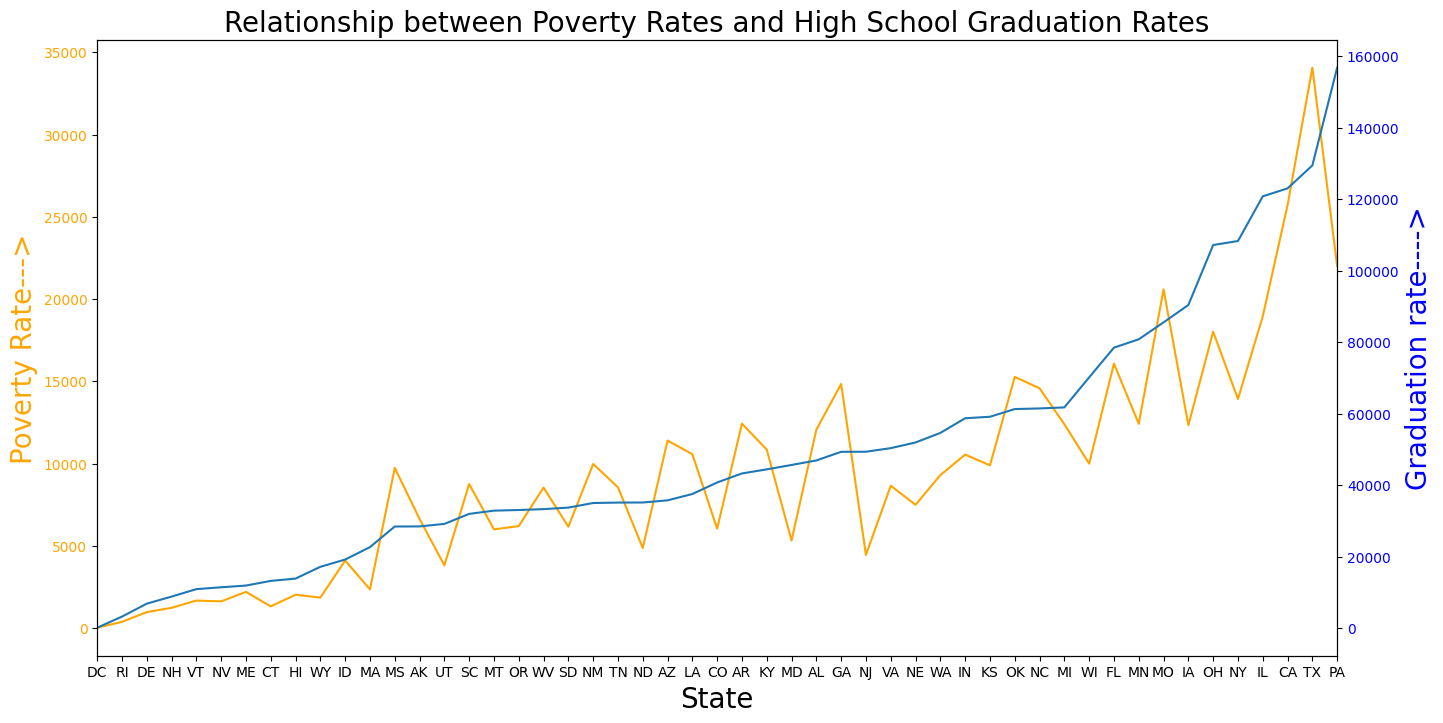

In [28]:
plt.figure(figsize=(16,8))
plt.title('Relationship between Poverty Rates and High School Graduation Rates',fontsize=20)
ax1=plt.gca()
ax2=ax1.twinx()
plt.xlim(0,50)
ax1.plot(povt_grd_rate['Geographic Area'],povt_grd_rate['poverty_rate'],color='orange')
ax2.plot(povt_grd_rate['Geographic Area'], povt_grd_rate['percent_completed_hs'])
ax1.set_xlabel("State",fontsize=20)
ax1.set_ylabel("Poverty Rate--->", color='orange', fontsize=20)
ax1.tick_params(axis="y", labelcolor='orange')

ax2.set_ylabel("Graduation rate---->", color='blue', fontsize=20)
ax2.tick_params(axis="y", labelcolor='blue')


plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

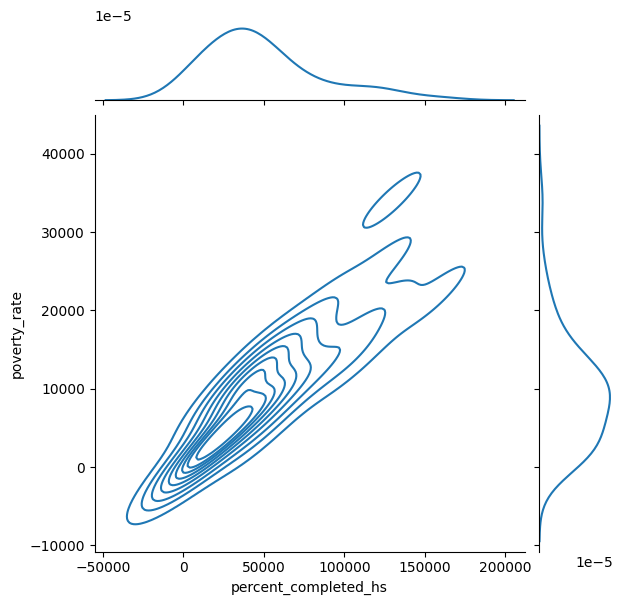

In [29]:
sns.jointplot(data=povt_grd_rate,
              x='percent_completed_hs',
              y='poverty_rate',
              kind = "kde"
              )
plt.show()

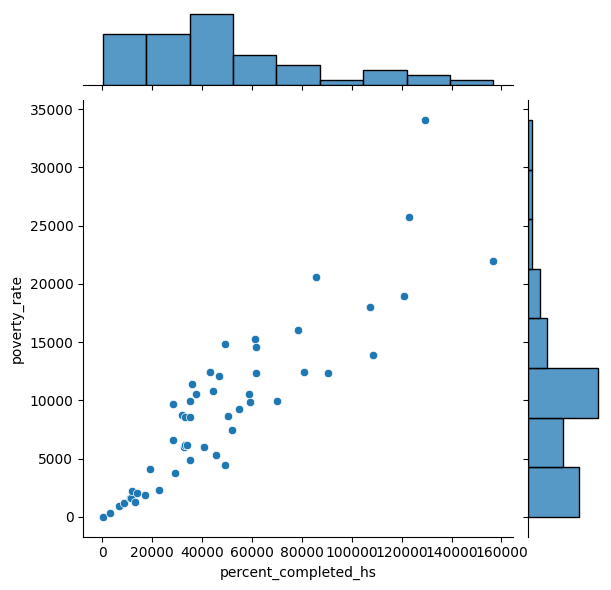

In [30]:
sns.jointplot(data=povt_grd_rate,
              x='percent_completed_hs',
              y='poverty_rate',
              )
plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

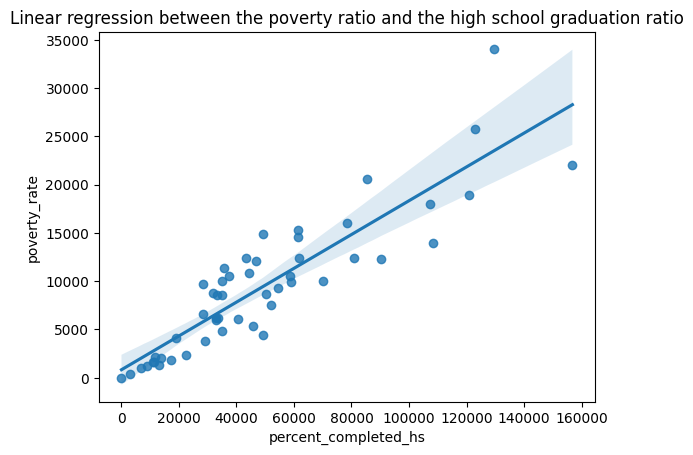

In [31]:
sns.regplot(x = "percent_completed_hs",
            y = "poverty_rate",
            data = povt_grd_rate)
plt.title("Linear regression between the poverty ratio and the high school graduation ratio")
plt.show()

<Figure size 1600x800 with 0 Axes>

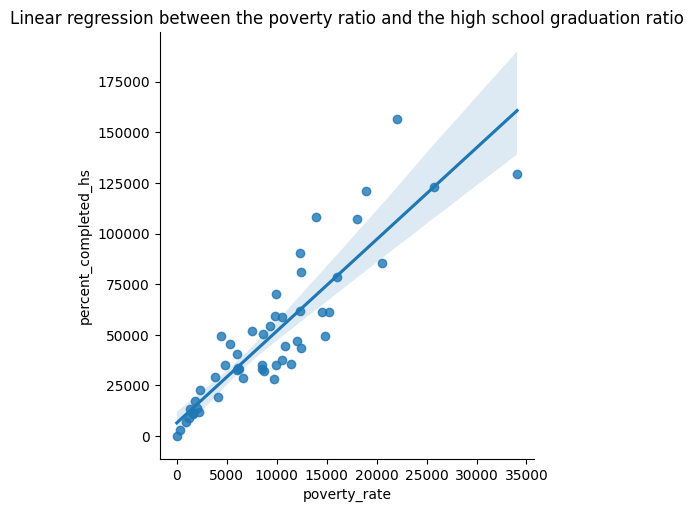

In [32]:
plt.figure(figsize=(16,8))

sns.lmplot(x = "poverty_rate",
            y = "percent_completed_hs",
            data = povt_grd_rate)
plt.title("Linear regression between the poverty ratio and the high school graduation ratio")
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [33]:
df_share_race_city

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.20,30.20,0.00,0.00,1.60
1,AL,Abbeville city,54.40,41.40,0.10,1.00,3.10
2,AL,Adamsville city,52.30,44.90,0.50,0.30,2.30
3,AL,Addison town,99.10,0.10,0.00,0.10,0.40
4,AL,Akron town,13.20,86.50,0.00,0.00,0.30
...,...,...,...,...,...,...,...
29263,WY,Woods Landing-Jelm CDP,95.90,0.00,0.00,2.10,0.00
29264,WY,Worland city,89.90,0.30,1.30,0.60,16.60
29265,WY,Wright town,94.50,0.10,1.40,0.20,6.20
29266,WY,Yoder town,97.40,0.00,0.00,0.00,4.00


In [34]:
race_state=df_share_race_city.groupby('Geographic area',as_index=False).agg({'share_white':pd.Series.sum,'share_black':pd.Series.sum,'share_native_american':pd.Series.sum,'share_asian':pd.Series.sum,'share_hispanic':pd.Series.sum})
race_state

,Geographic area,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AK,"16,068.80",199.70,"16,144.40",488.70,756.50
1,AL,"41,909.20","13,480.30",381.10,277.30,"1,722.50"
2,AR,"42,441.20","8,816.60",411.10,258.10,"2,311.70"
3,AZ,"27,028.00",430.50,"12,894.00",327.70,"9,085.20"
4,CA,"108,949.30","4,081.10","2,612.20","8,441.40","44,949.20"
5,CO,"40,197.90",420.30,744.20,528.90,"8,197.60"
6,CT,"12,313.10",713.90,93.90,427.50,"1,140.50"
7,DC,38.50,50.70,0.30,3.50,9.10
8,DE,"5,794.70","1,169.90",39.80,152.00,563.70
9,FL,"72,378.70","12,301.20",419.00,"1,487.40","15,206.80"


In [ ]:
fig = px.bar(race_state, x="Geographic area",
             y=["share_white", "share_black", "share_native_american","share_asian","share_hispanic"],
             title="Racial Makeup of Each US State")
fig.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [35]:
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,O,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,0.00,M,O,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,O,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


In [36]:
death_race=df_fatalities.value_counts('race')

In [37]:
fig=px.pie(labels=death_race.index,
           values=death_race.values,
           hover_name=death_race.index)
fig.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

In [38]:
death_gender=df_fatalities.value_counts('gender')

In [39]:
fig=px.bar(x= death_gender.index,
           y= death_gender.values,
           color=death_gender.index,
           hover_name= death_gender.index)
fig.show()

In [40]:
fig=px.pie(labels= death_gender.index,
           values= death_gender.values,
           hover_name= death_gender.index)
fig.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

In [41]:
male=df_fatalities[['manner_of_death','age','gender']][df_fatalities.gender=='M']
female=df_fatalities[['manner_of_death','age','gender']][df_fatalities.gender=='F']

In [42]:
bax_fig=px.box(male,x='manner_of_death',y=['age'],notched=True,points='all',title='Box Plot Showing the Age and Manner of Death of Male')
bax_fig

In [43]:
bax_fig=px.box(female,x='manner_of_death',y=['age'],notched=True,points='all',title='Box Plot Showing the Age and Manner of Death of Female')
bax_fig

# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [44]:
armed_=df_fatalities.value_counts('armed')
armed_
gun_unarmed=df_fatalities.query('armed=="gun" or armed=="unarmed"').value_counts('armed')

In [45]:
print(f"percentage of police killings were people armed {armed_.mean()}")

percentage of police killings were people armed 36.73913043478261


In [46]:
fig=px.bar(x= armed_.index,
           y= armed_.values,
           color=armed_.index,
           hover_name= armed_.index)
fig.show()

In [47]:
fig=px.pie(labels= gun_unarmed.index,
           values= gun_unarmed.values,
           color=gun_unarmed.index,
           hover_name= gun_unarmed.index)
fig.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [48]:
age_u_25=df_fatalities.query('age<25').groupby('age',as_index=False).count()
age_u_25

,age,id,name,date,manner_of_death,armed,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,0.00,77,77,77,77,77,77,77,77,77,77,77,77,77
1,6.00,1,1,1,1,1,1,1,1,1,1,1,1,1
2,12.00,1,1,1,1,1,1,1,1,1,1,1,1,1
3,13.00,1,1,1,1,1,1,1,1,1,1,1,1,1
4,14.00,1,1,1,1,1,1,1,1,1,1,1,1,1
5,15.00,8,8,8,8,8,8,8,8,8,8,8,8,8
6,16.00,16,16,16,16,16,16,16,16,16,16,16,16,16
7,17.00,23,23,23,23,23,23,23,23,23,23,23,23,23
8,18.00,54,54,54,54,54,54,54,54,54,54,54,54,54
9,19.00,41,41,41,41,41,41,41,41,41,41,41,41,41


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

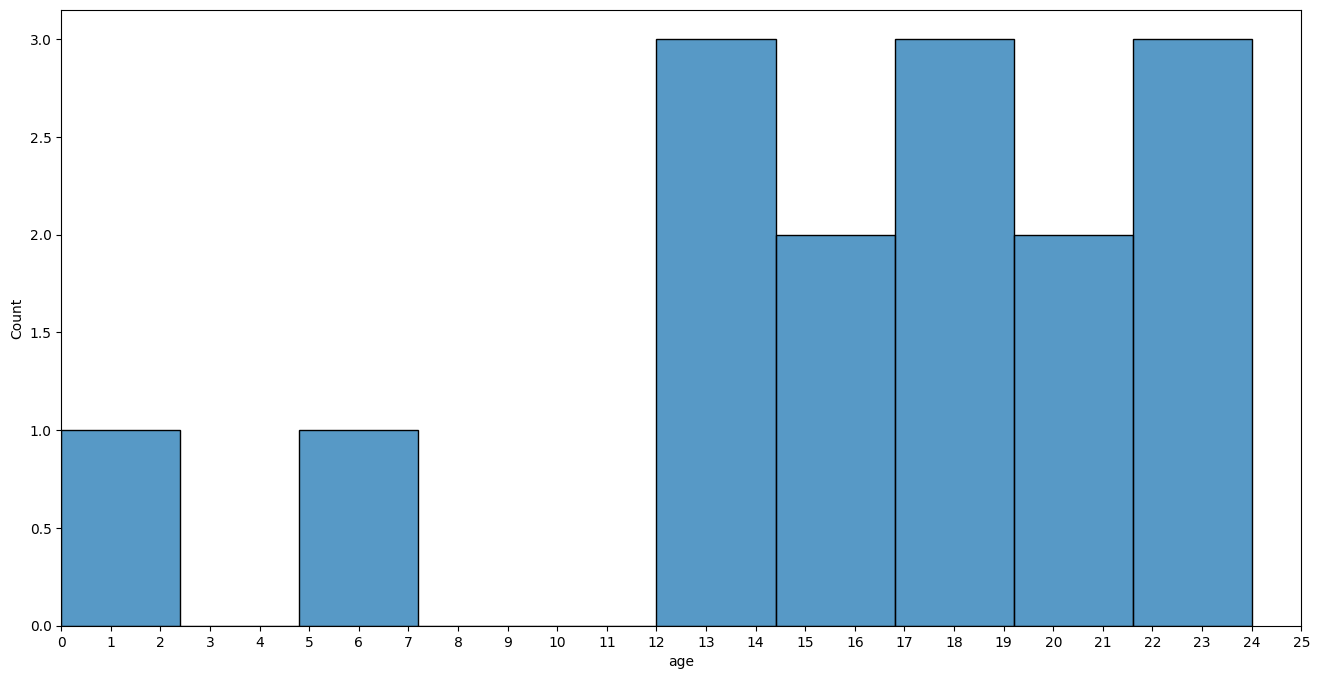

In [49]:
plt.figure(figsize=(16,8))
plt.xlim(0,25)
plt.xticks((range(0,26)))
sns.histplot(data=age_u_25,
             x=age_u_25.age,
             bins=10)
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions?

In [64]:
dd=df_fatalities.value_counts('race')
dd

,count
race,
W,1201
B,618
H,423
O,223
A,39
N,31


<ipython-input-65-4e0509e18838>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.




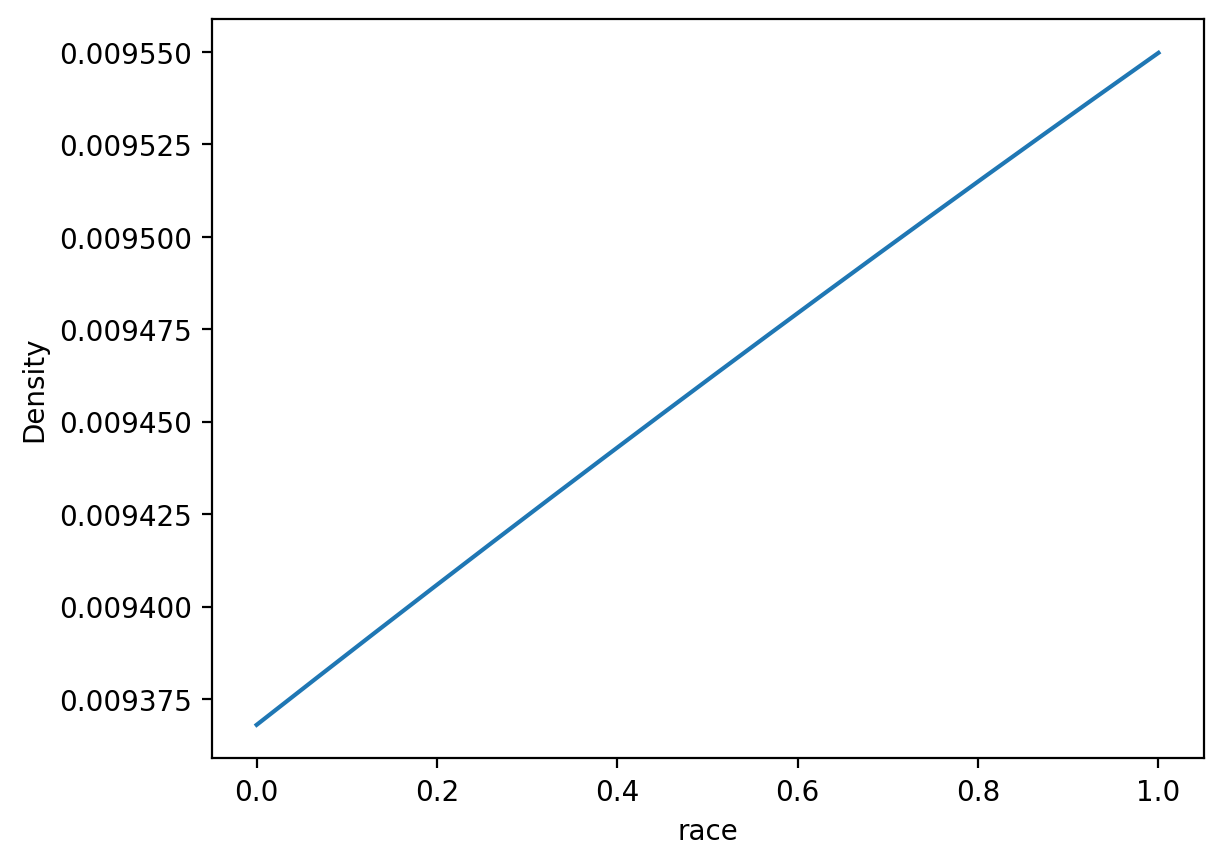

In [65]:
plt.figure(dpi=200)
sns.kdeplot(age_u_25.race,
            shade=False,
            clip=(0,1))
plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race.

In [67]:
fig=px.bar(x= dd.index,
           y= dd.values,
           color=dd.index,
           hover_name= dd.index)
fig.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [70]:
mental_illnes=df_fatalities.value_counts('signs_of_mental_illness')

In [72]:
fig=px.pie(labels=mental_illnes.index,
           values=mental_illnes.values,
           title='Percentage of people killed by police have been diagnosed with a mental illness',
           hover_name=mental_illnes.index)
fig.show()

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [205]:
top_10_cities=df_fatalities.value_counts('city').sort_values(ascending=False)[:10]
top_10_cities

,count
city,
Los Angeles,39
Phoenix,31
Houston,27
Chicago,25
Las Vegas,21
San Antonio,20
Columbus,19
Miami,18
Austin,18


In [92]:
fig=px.bar(x= top_10_cities.index,
           y= top_10_cities.values,
           color=top_10_cities.index,
           hover_name=top_10_cities.index)
fig.update_layout(xaxis_title='Cities----->',
                  yaxis_title='Police killing----->')
fig.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

In [143]:
df_fatalities[['city','race']].query('city==["Los Angeles","Phoenix","Houston","Chicago","Las Vegas","San Antonio","Columbus","Miami","Austin","St. Louis"]')

,city,race
12,Columbus,B
40,Los Angeles,H
48,St. Louis,B
52,Austin,W
64,Phoenix,N
66,Columbus,B
74,Houston,H
79,St. Louis,B
94,Austin,W
124,Houston,H


In [ ]:
fig = px.bar(race_state, x="Geographic area",
             y=["share_white", "share_black", "share_native_american","share_asian","share_hispanic"],
             title="Racial Makeup of Each US State")
fig.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [206]:
states=df_fatalities.value_counts('state')
states

,count
state,
CA,424
TX,225
FL,154
AZ,118
OH,79
OK,78
CO,74
GA,70
NC,69


In [207]:
world_map=px.choropleth(states,
                        locationmode="USA-states",
                        locations=states.index,
                        color=states.values,
                        hover_name=states.index,
                        color_continuous_scale='matter',
                         scope="usa")
world_map.show()

In [154]:
poverty_rate_
poverty_map=px.choropleth(poverty_rate_,
                        locationmode="USA-states",
                        locations=poverty_rate_['Geographic Area'],
                        color=poverty_rate_.	poverty_rate,
                        hover_name=poverty_rate_['Geographic Area'],
                        color_continuous_scale='matter',
                         scope="usa")
poverty_map.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

In [243]:
df_fatalities['date']=pd.to_datetime(df_fatalities['date'])


In [244]:
year_on_year= df_fatalities['date'].dt.strftime('%Y')
year_on_year=year_on_year.groupby(year_on_year.values).count()
year_on_year

,date
2015,991
2016,963
2017,581


In [247]:
fig=px.bar(x=year_on_year.index,y=year_on_year.values,color=year_on_year.index)
fig.update_layout(xaxis_title='Year--->',
                  yaxis_title='Count--->',
                  title='Year On Year')
fig.show()

In [248]:
month_on_month=df_fatalities['date'].dt.strftime('%Y/%m')
month_on_month=month_on_month.groupby(month_on_month.values).count()
month_on_month

,date
2015/01,70
2015/02,78
2015/03,87
2015/04,88
2015/05,85
2015/06,68
2015/07,85
2015/08,86
2015/09,90
2015/10,89


In [250]:
fig=px.bar(x=month_on_month.index,y=month_on_month.values,color=month_on_month.index)
fig.update_layout(xaxis_title='Month--->',
                  yaxis_title='Count--->',
                  title='Month On Month')
fig.show()

In [251]:
day_on_day=df_fatalities['date'].dt.strftime('%Y/%m/%d')
day_on_day=day_on_day.groupby(day_on_day.values).count()
day_on_day

,date
2015/01/03,3
2015/01/04,2
2015/01/06,1
2015/01/07,2
2015/01/08,2
...,...
2017/12/03,2
2017/12/04,1
2017/12/05,4
2017/12/06,4


In [252]:
fig=px.bar(x=day_on_day.index,y=day_on_day.values,color=day_on_day.index)
fig.update_layout(xaxis_title='Month--->',
                  yaxis_title='Day--->',
                  title='Day On Day')
fig.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).

<ipython-input-254-6bb288c89860>:11: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-254-6bb288c89860>:12: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-254-6bb288c89860>:13: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-254-6bb288c89860>:14: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-254-6bb288c89860>:15: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-254-6bb288

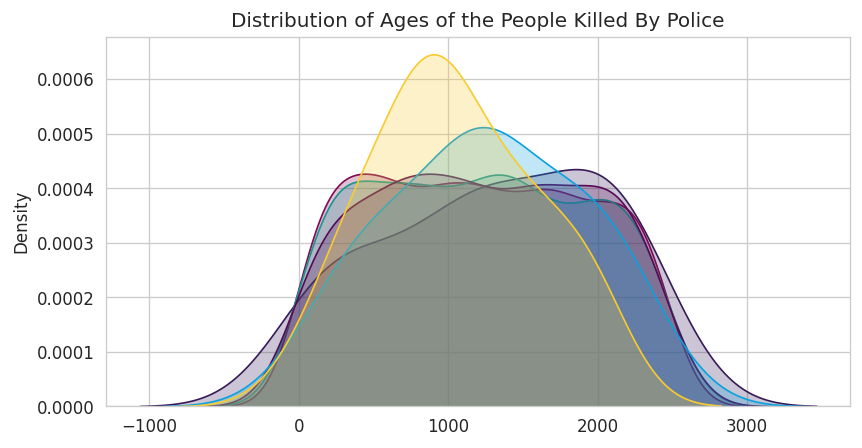

In [254]:
# separate KDE plot for each race
race_A = df_fatalities.loc[df_fatalities.race == "A"]
race_W = df_fatalities.loc[df_fatalities.race == "W"]
race_B = df_fatalities.loc[df_fatalities.race == "B"]
race_H = df_fatalities.loc[df_fatalities.race == "H"]
race_N = df_fatalities.loc[df_fatalities.race == "N"]
race_O = df_fatalities.loc[df_fatalities.race == "O"]

plt.figure(figsize=(8, 4), dpi=120)
with sns.axes_style("whitegrid"):
    sns.kdeplot(race_A.race.index, shade=True, color='#371B58')
    sns.kdeplot(race_W.race.index, shade=True, color='#810955')
    sns.kdeplot(race_B.race.index, shade=True, color='#18978F')
    sns.kdeplot(race_H.race.index, shade=True, color='#570A57')
    sns.kdeplot(race_N.race.index, shade=True, color='#0AA1DD')
    sns.kdeplot(race_O.race.index, shade=True, color='#F8CB2E')
plt.title("Distribution of Ages of the People Killed By Police")
plt.show()